# 1. 서울시 구별 CCTV/인구 분석

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
df = pd.read_csv('서울시_CCTV_인구_병합데이터.csv')
df.set_index('구별', inplace=True)
df.head()

,CCTV댓수,최근증가율,인구수,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
종로구,1772,20.49,155106,9077,27605,5.85,17.80
중구,2333,78.98,132259,9243,23980,6.99,18.13
용산구,2383,78.64,240665,14287,38884,5.94,16.16
성동구,3602,46.13,295767,6605,45591,2.23,15.41
광진구,2588,112.29,355306,12825,50815,3.61,14.30


- 상관관계 분석

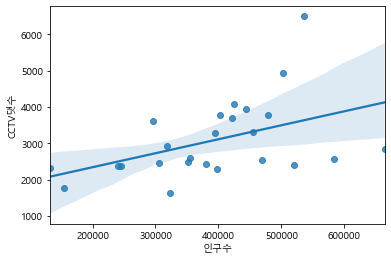

In [5]:
# CCTV 댓수 vs. 인구수, 외국인 비율, 고령자비율
sns.regplot(x='인구수', y='CCTV댓수', data=df)
plt.show()

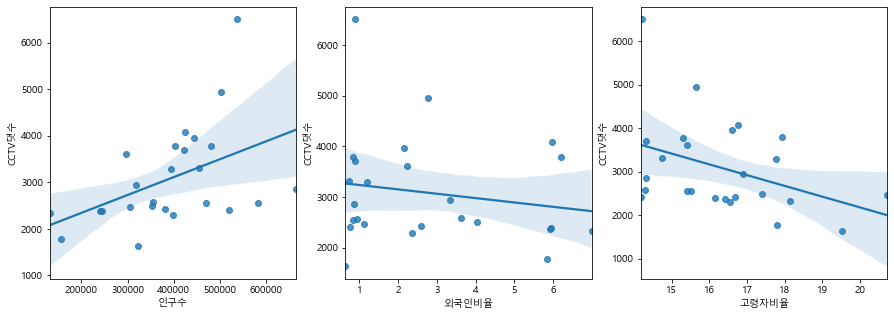

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5)) # 표를 여러개 그리는 것은 plt.subplots
features = ['인구수', '외국인비율', '고령자비율']
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='CCTV댓수', data=df, ax=axs[i]) # 표의 모양을 그려주는 것은 sns.regplot

In [10]:
# subplot과 subplots의 차이 
    # subplot
    # subplots : for문과 자주 사용한다.

In [8]:
# enumerate는 features의 index까지 같이 나오게 만들어 줌
    # 참고 : for문에 enumerate 함수 사용하기
    # - https://www.daleseo.com/python-enumerate/, https://hckcksrl.medium.com/python-enumerate-b19ad6b94c00
for i, feature in enumerate(features):
    print(i, feature)

0 인구수
1 외국인비율
2 고령자비율


- 구별 CCTV 댓수

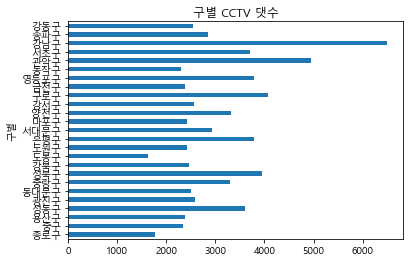

In [12]:
# 이게 뭐지? 싶게 그래프가 나온다.
df.CCTV댓수.plot(kind='barh')
plt.title('구별 CCTV 댓수')
plt.show()

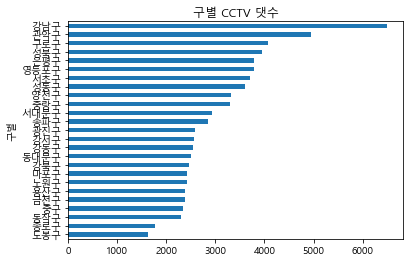

In [13]:
df.CCTV댓수.sort_values().plot(kind='barh') # 값이 큰 순서대로 보고 싶으면 sort_values를 사용하면 된다.
plt.title('구별 CCTV 댓수')
plt.show()

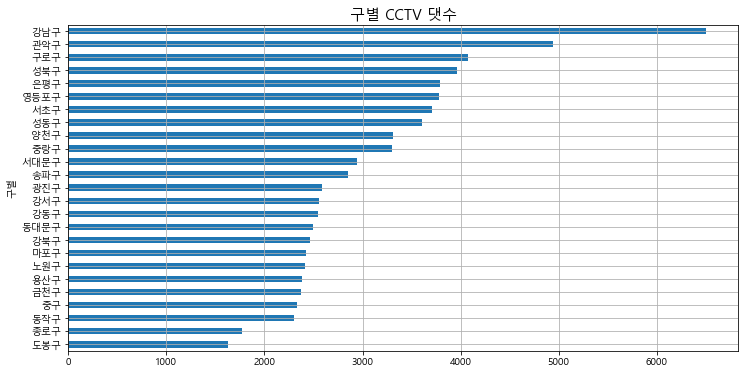

In [14]:
df.CCTV댓수.sort_values().plot(kind='barh', grid=True, figsize=(12,6))
plt.title('구별 CCTV 댓수', fontsize=15)
plt.show()

In [15]:
# 어떻게 시각화를 구현해야 할지, 데이터의 성격에 따라 다르다
    # category에 대한 변수의 변화 - 막대 그래프
        # lavel을 세로축에 둔 이유는 한국어는 x축에 두면 직관적으로 보기 불편하므로

- 인구 천 명당 CCTV 댓수

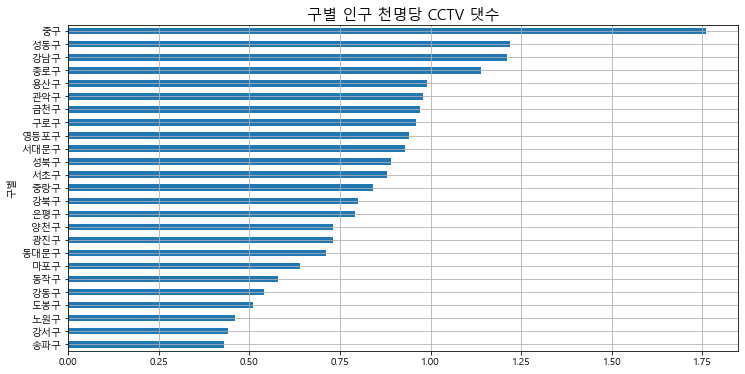

In [16]:
df['천명당CCTV'] = (df.CCTV댓수 / df.인구수 * 100).round(2)
df.천명당CCTV.sort_values().plot(kind='barh', grid=True, figsize=(12,6))
plt.title('구별 인구 천명당 CCTV 댓수', fontsize=15)
plt.show()

### 인구수와 CCTV 댓수 분석

- 산점도 (Scatter plot)

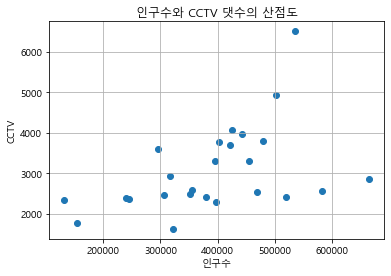

In [17]:

plt.scatter(x=df.인구수, y=df.CCTV댓수)
plt.grid()
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

- 회귀선

In [20]:
weight, bias = np.polyfit(df.인구수, df.CCTV댓수, 1) # 1차식이면 직선, 2차식이면 제곱방정식 그래프, ...
weight, bias                                         # y = ax + b (y: coefficient 계수, a: 기울기 -> weight , b: intercept 절편 -> bias)
# 참고 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=changkh&logNo=30171349203

(0.0038511976508863724, 1572.3151359747483)

In [21]:
# matplot -> plot이라는 함수는 직선을 만드려면 (x1,y1) (x2,y2)를 이어야 만들 수 있다. -> [x1,y1], [x2,y2]를 구해야 한다.

In [25]:
xs = np.array([100000, 700000])
ys = weight * xs + bias
ys

array([1957.43490106, 4268.1534916 ])

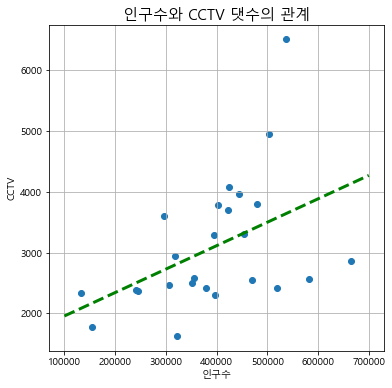

In [27]:
plt.figure(figsize=(6,6))
plt.scatter(x=df.인구수, y=df.CCTV댓수)
plt.plot(xs, ys, 'g--', lw=3) # 'r-' : 빨간색 실선, 'g--' : 초록색 점선
plt.grid()
plt.title('인구수와 CCTV 댓수의 관계',fontsize=15)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

- 회귀선과 산점도 사이의 오차

In [28]:
df['오차'] = abs(df.CCTV댓수 - (df.인구수*weight + bias)).round(2) # abs는 절대값(absolute) 연산 함수
df_sort = df.sort_values(by='오차', ascending=False)
df_sort.head(10)

,CCTV댓수,최근증가율,인구수,외국인,고령자,외국인비율,고령자비율,천명당CCTV,오차
구별,,,,,,,,,
강남구,6502,61.64,536107,4732,76184,0.88,14.21,1.21,2865.03
관악구,4942,49.91,502698,13898,78647,2.76,15.64,0.98,1433.70
송파구,2854,203.19,664341,5671,95164,0.85,14.32,0.43,1276.82
강서구,2560,78.53,582995,5476,90404,0.94,15.51,0.44,1257.54
도봉구,1629,82.82,322419,2054,62894,0.64,19.51,0.51,1185.01
노원구,2415,66.38,520005,4008,86697,0.77,16.67,0.46,1159.96
성동구,3602,46.13,295767,6605,45591,2.23,15.41,1.22,890.63
구로구,4075,48.83,424582,25316,71186,5.96,16.77,0.96,867.54
강동구,2547,112.25,469094,3885,72275,0.83,15.41,0.54,831.89


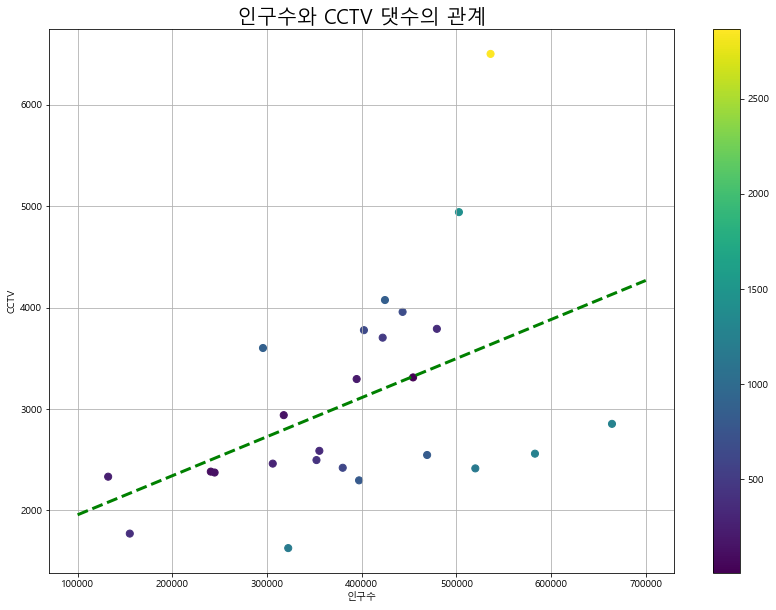

In [30]:
plt.figure(figsize=(14,10)) 
plt.scatter(x=df.인구수, y=df.CCTV댓수, c=df.오차, s=50)
plt.plot(xs, ys, 'g--', lw=3) # 'r-' : 빨간색 실선, 'g--' : 초록색 점선
plt.grid()
plt.title('인구수와 CCTV 댓수의 관계',fontsize=20)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar() # 기준선에서 벗어나는 점의 색깔을 표시해준다.
plt.show()

- 최종 그림: text 포함

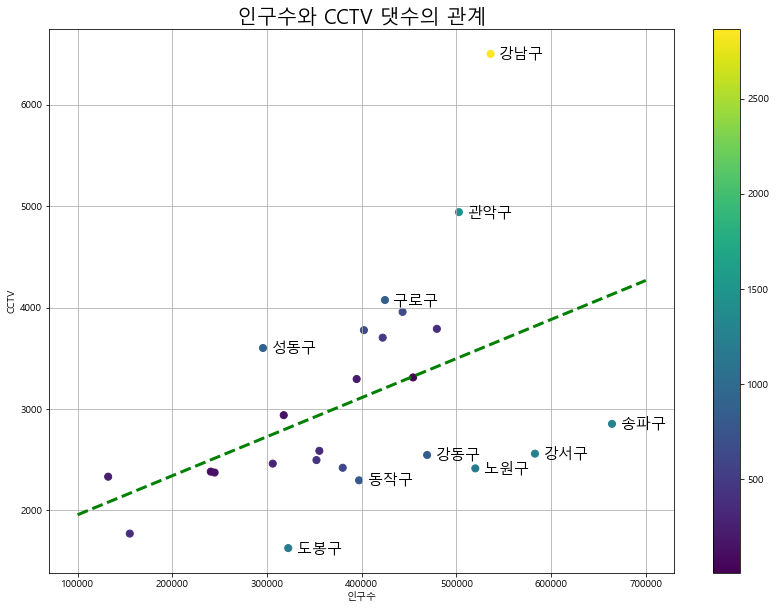

In [32]:
plt.figure(figsize=(14,10)) # x축 길이 14, y축 길이 10
plt.scatter(x=df.인구수, y=df.CCTV댓수, c=df.오차, s=50)
plt.plot(xs, ys, 'g--', lw=3) # 'r-' : 빨간색 실선, 'g--' : 초록색 점선
for i in range(10):
    plt.text(df_sort.인구수[i]+9000, df_sort.CCTV댓수[i]-50,   # 순서대로 x축 좌표, y축 정보, 표시하고자 하는 정보, 폰트 사이즈
    df_sort.index[i], fontsize=15)                                  # ex. df_sort.인구수[i]+9000 : point는 직접 찾아봐야 한다. => 이 값이 없다면 선을 기준으로 분포하는 정도가 적어 
                                                                    #   직관적으로 알아보기 어렵다.

plt.grid()
plt.title('인구수와 CCTV 댓수의 관계',fontsize=20)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar() # 기준선에서 벗어나는 점의 색깔을 표시해준다.
plt.savefig('서울시_인구수와_CCTV댓수의_관계.png') # plt.savefig(): plt.show()를 하지 않아도 그래프를 보여주고, 저장도 해준다.